# 30 Keras NotMNIST

* http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html
* http://yaroslavvb.com/upload/notMNIST/

I've taken some publicly available fonts and extracted glyphs from them to make a dataset similar to MNIST. There are 10 classes, with letters A-J taken from different fonts. Here are some examples of letter "A" 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from scipy import io
import numpy as np
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

# try using other layers
from keras.layers import Conv2D, MaxPool2D, Dropout

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# load data
data = io.loadmat("data/notMNIST_small.mat")

In [3]:
# transform data
X = data['images']
y = data['labels']
resolution = 28
classes = 10

X = np.transpose(X, (2, 0, 1))

y = y.astype('int32')
X = X.astype('float32') / 255.

# channel for X
X = X.reshape((-1, resolution, resolution, 1))

# 3 -> [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]
Y = np_utils.to_categorical(y, 10)

It is: J


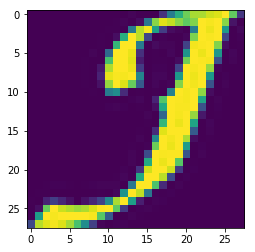

In [4]:
# looking at data; some fonts are strange
i = 100
print("It is:", "ABCDEFGHIJ"[y[i]])
plt.imshow(X[i,:,:,0]);

In [5]:
# splitting data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [6]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(14979, 28, 28, 1)
(14979, 10)
(3745, 28, 28, 1)
(3745, 10)


In [7]:
# Logistic Regression

In [8]:
# Flat model, logistic regression
model = Sequential()
model.add(Flatten(input_shape=(resolution, resolution, 1)))
model.add(Dense(classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])




In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(X_train, Y_train,
           epochs=10,
           batch_size=32,
           validation_data=(X_test, Y_test), verbose=0)

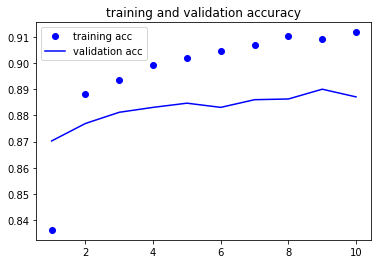

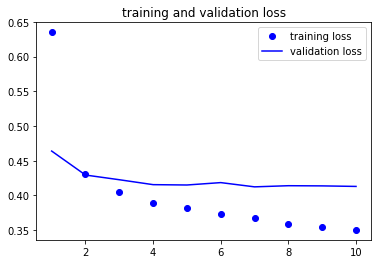

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()